## Figure 6



In [1]:
import sys
import os

# Get the absolute path to the project root (one directory up from notebooks/)
root_path = os.path.abspath("..")
sys.path.append(root_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src import figure_Tools as fT



# needed datasets
df_point = pd.read_pickle("../Data/Point_data.pkl")
df_vertex = pd.read_pickle("../Data/Vertex_data.pkl")
df_edges = pd.read_pickle('../Data/Edge_data.pkl')
df_deviation = pd.read_pickle('../Data/Segment_deviation_data.pkl')


### Figure 6a

Text(0, 0.5, 'Total Number of \n branching Nodes')

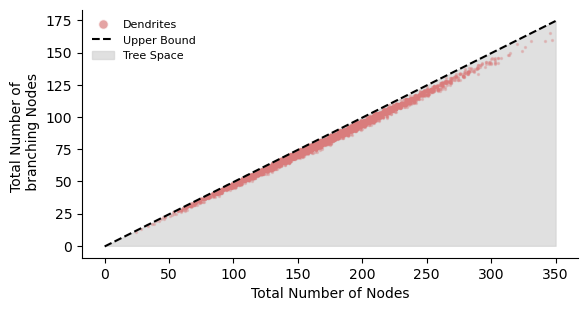

In [2]:
fig, ax = plt.subplots()

fT.point_ratio_scatter(ax, df_point, legend_pointsize = 7, legend_fontsize = 8)
ax.set_ylabel("Total Number of \n branching Nodes")

### Figure 6b

Text(0, 0.5, 'Probability Mass')

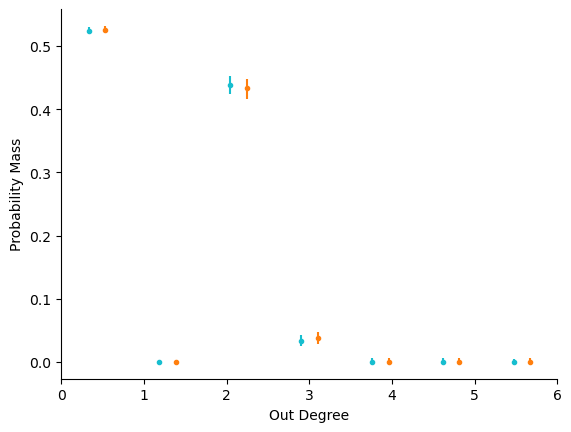

In [3]:
fig, ax = plt.subplots()

fT.error_plot(
    ax=ax, df=df_vertex, colours=fT.Type_colours, DV="Out_degree", x0=0, x1=6, ms=3
)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xticks(np.arange(7))
ax.set_xlabel("Out Degree")
ax.set_ylabel("Probability Mass")

### Figure 6c

Text(0, 0.5, 'Probability Mass')

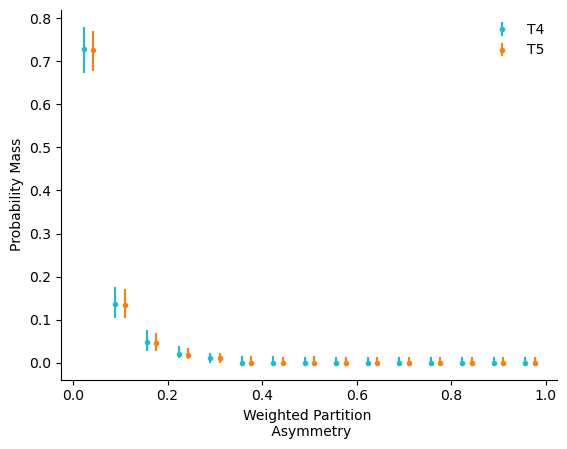

In [4]:
fig, ax = plt.subplots()

# make sure we are not looking at leaf vertices
df = df_vertex.loc[df_vertex.Out_degree != 0]
offsets = [-0.01, 0.01]
fT.error_plot(
    ax=ax,
    df=df,
    colours=fT.Type_colours,
    DV="Weighted_asymmetry",
    x0=0,
    x1=1,
    num_bins=15,
    offsets=offsets,
    ms=3,
)
ax.legend(frameon=False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Weighted Partition \n Asymmetry")
ax.set_ylabel("Probability Mass");

### Figure 6d

Text(0, 0.5, 'Probability Mass')

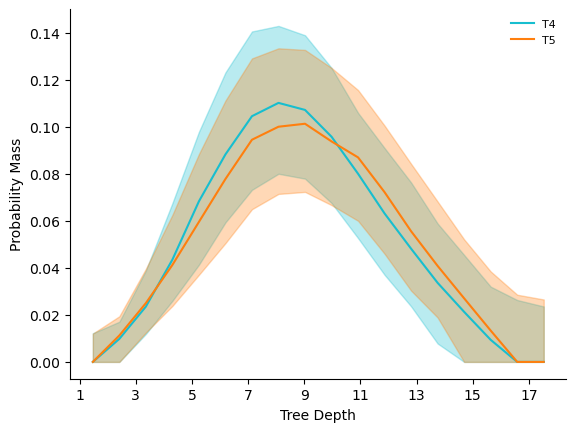

In [5]:
fig, ax = plt.subplots()

df = df_edges[df_edges.isExternal == True]

fT.repeated_measures_PMF_df(
    ax=ax,
    df=df,
    group_col="Type",
    DV="Depth",
    groups=fT.Types,
    colours=fT.Type_colours,
    x0=1,
    x1=18,
    num_bins=18,
    fill_kwargs={"alpha": 0.3},
)

# ax.grid(False)
ax.legend(frameon = False, fontsize = 8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(np.arange(1,18,2));
ax.set_xlabel('Tree Depth')
ax.set_ylabel('Probability Mass')

### Figure 6e

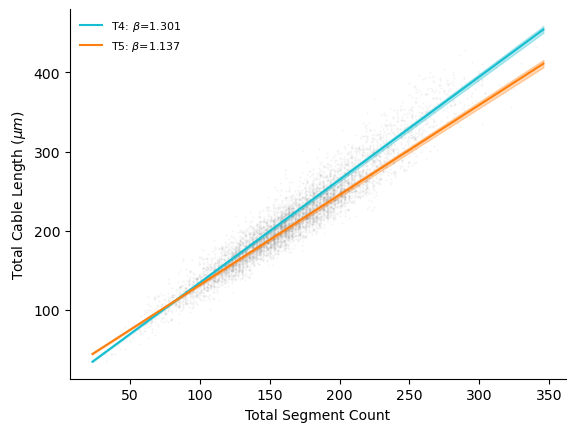

In [6]:
fig, ax = plt.subplots()

# being a bit lazy here, but scale total cable to microns in a copy (I made the mistake of scaling multiple times before)
tmp_df = df_point.copy()
tmp_df['Total_Cable'] = tmp_df['Total_Cable'] * 0.001

fT.regPlot(
    ax = ax,
    df = tmp_df,
    DV = 'Total_Cable',
    IV_col = 'Segment_Count',
    group_col = 'Type',
    groups = fT.Types,
    colours = fT.Type_colours,
    line_kwargs = dict(),
    point_kwargs = {'alpha':0.05,'s':0.7,'c':'gray'},
    fill_kwargs = {'alpha':0.3},
    legend_kwargs = {'fontsize': 8, 'frameon':False}
)

ax.set_ylabel(r'Total Cable Length $(\mu m)$')
ax.set_xlabel('Total Segment Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel(r'Total Cable Length $(\mu m)$')
ax.set_xlabel('Total Segment Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Figure 6f (left)

Text(0, 0.5, 'Section length $(\\mu m)$')

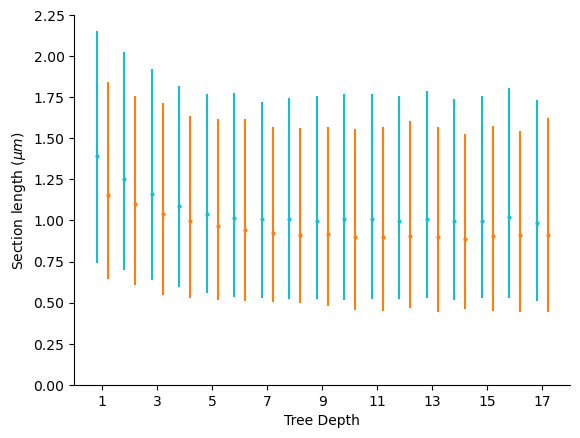

In [9]:
fig, ax = plt.subplots()

fT.Section_decay_plot(ax = ax, df = df_edges, isExternal = False)

ax.set_ylim([0,2.25])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(np.arange(1,18,2));
ax.set_xlabel("Tree Depth")
ax.set_ylabel(r"Section length $(\mu m)$")

### Figure 6f (right)

Text(0, 0.5, 'Section length $(\\mu m)$')

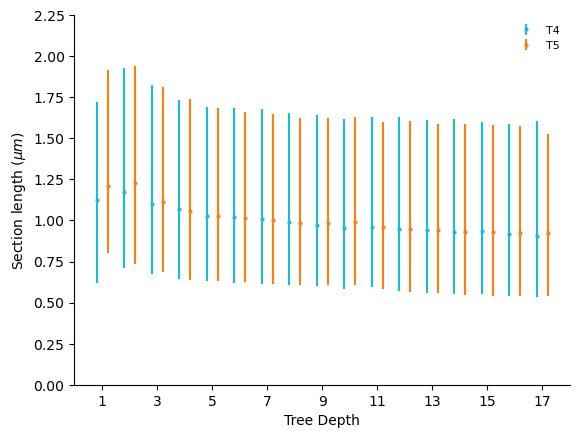

In [10]:
fig, ax = plt.subplots()

fT.Section_decay_plot(ax = ax, df = df_edges, isExternal = True)

ax.legend(frameon = False, fontsize = 8)
ax.set_ylim([0,2.25])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(np.arange(1,18,2));
ax.set_xlabel("Tree Depth")
ax.set_ylabel(r"Section length $(\mu m)$")

### Figure 6h

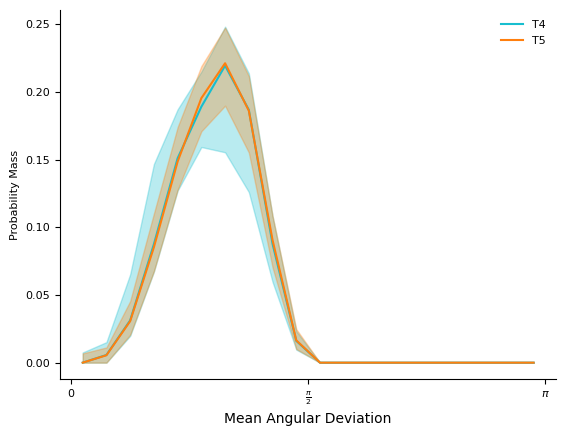

In [12]:
fig, ax = plt.subplots()

fT.repeated_measures_PMF_df(
    ax,
    df_deviation,
    "Mean",
    "Type",
    fT.Types,
    fT.Type_colours,
    x0=0,
    x1=np.pi,
    num_bins=20,
    fill_kwargs={"alpha": 0.3},
)
ax.set_xticks([0, np.pi / 2, np.pi], [0, r"$\frac{\pi}{2}$", r"$\pi$"])
ax.legend(frameon=False, fontsize=8)
ax.tick_params(axis="both", labelsize=8)
ax.set_ylabel("Probability Mass", fontsize=8)
ax.set_xlabel("Mean Angular Deviation")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

### Figure 6i

Text(0.5, 0, 'Angular Varience')

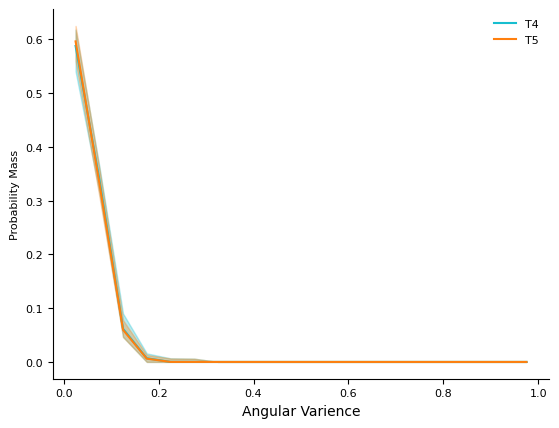

In [13]:
fig, ax = plt.subplots()

fT.repeated_measures_PMF_df(
    ax,
    df_deviation,
    "Varience",
    "Type",
    fT.Types,
    fT.Type_colours,
    0,
    1,
    20,
    fill_kwargs={"alpha": 0.3},
)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(frameon=False, fontsize=8)
ax.tick_params(axis="both", labelsize=8)
ax.set_ylabel("Probability Mass", fontsize=8)
ax.set_xlabel("Angular Varience");